# Function to fit 1D potentials to an analytic function

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# upload file
from google.colab import files
uploaded = files.upload()

Saving scan_tot_ener.txt to scan_tot_ener.txt


     0              1
0  0.5  340359.984793
1  0.6  180095.640508
2  0.7   98957.580499
3  0.8   57433.706495
4  0.9   35920.782060


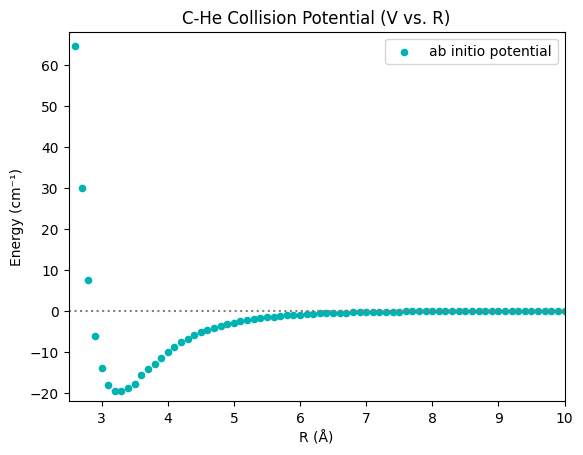

In [21]:
# create dataframe and plot
df = pd.read_csv('scan_tot_ener.txt', sep='\s+', header=None)
x_dummy = df[0]
y_dummy = df[1]
print(df.head())
plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3',label = 'ab initio potential')
plt.legend(loc="upper right")
plt.ylabel("Energy (cm⁻¹)")
plt.xlabel("R (Å)")
plt.axhline(y=0, color='grey', linestyle=':')
plt.title("C-He Collision Potential (V vs. R)")
plt.ylim(-22, 68)
plt.xlim(2.5, 10)
plt.show()

In [125]:
# declare function and variables
from scipy.optimize import curve_fit
lm = 1 # number of angles
a,b,c,d,e,f,rmsx = np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm)
def exp_fit3(x, a,b,c):
    return  a*np.exp(-1.5*x)+b*np.exp(-3*x)+c*np.exp(-4*x)
def exp_fit2(x, d,e):
    return  d*np.exp(-2*x)+e*np.exp(-3*x)

Angle :  0
Fitting coefficients for exp_fit function [a b c]:  [  -4606.3870857   139821.89094076 3297345.42536237]
Fitting coefficients for exp_fit function [d e]:  [-41463.48481245 717756.5884436 ]


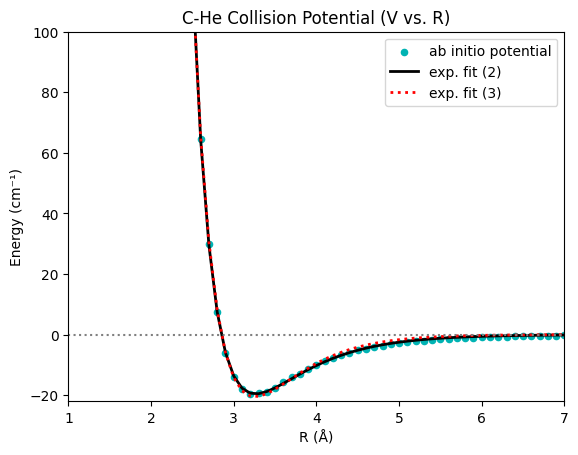

Double exponential RMSE1 =  0.2074889776519153
Double exponential RMSE2 =  0.595123836146574


In [126]:
# function for fitting and plotting
for i in range(0,lm):
    strt=20     # starting point for fit (choose carefully to avoid bad fit near minimas)
    parsx1, covx1 = curve_fit(f=exp_fit3, xdata=x_dummy[strt:], ydata=y_dummy[strt:], p0=[0,0,100]) # p0 = guess values
    a[i],b[i],c[i] = parsx1
    parsx2, covx2 = curve_fit(f=exp_fit2, xdata=x_dummy[strt:], ydata=y_dummy[strt:], p0=[0,0]) # p0 = guess values
    d[i],e[i] = parsx2
    print("Angle : ", i)
    print("Fitting coefficients for exp_fit function [a b c]: ",parsx1)
    print("Fitting coefficients for exp_fit function [d e]: ",parsx2)
    # Plot the fit data as an overlay on the scatter data
    plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3',label = 'ab initio potential')
    plt.plot(x_dummy, exp_fit3(x_dummy, *parsx1), linestyle='-', linewidth=2, color='black', label = 'exp. fit (2)')
    plt.plot(x_dummy, exp_fit2(x_dummy, *parsx2), linestyle=':', linewidth=2, color='red', label = 'exp. fit (3)')
    plt.legend(loc="upper right")
    plt.ylabel("Energy (cm⁻¹)")
    plt.xlabel("R (Å)")
    plt.axhline(y=0, color='grey', linestyle=':')
    plt.title("C-He Collision Potential (V vs. R)")
    plt.ylim(-22,100)
    plt.xlim(1, 7)
    plt.show()
    print('Double exponential RMSE1 = ',np.sqrt(np.average(np.power((exp_fit3(x_dummy[strt:], *parsx1) - y_dummy[strt:]),2))))
    print('Double exponential RMSE2 = ',np.sqrt(np.average(np.power((exp_fit2(x_dummy[strt:], *parsx2) - y_dummy[strt:]),2))))


Angle :  0
Fitting coefficients for exp_fit function [a b c]:  [  -4606.3870857   139821.89094076 3297345.42536237]


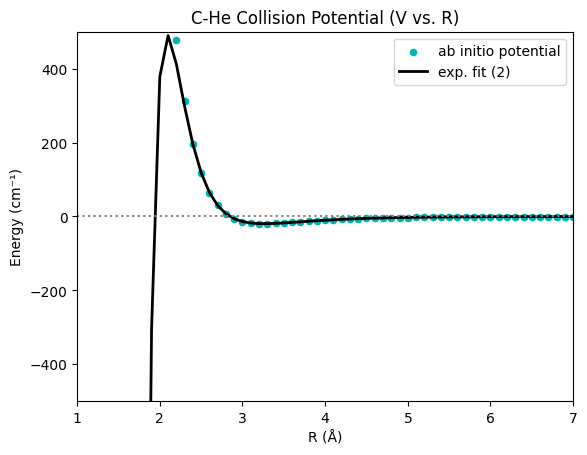

Double exponential RMSE3 =  0.18742109212338268


In [134]:
# An overfitting function
def exp_fit5(x, a,b,c,d,e):
    return  a*np.exp(-1.5*x)+b*np.exp(-3*x)+c*np.exp(-4*x)+d*np.exp(-6*x)+e*np.exp(-7*x)
for i in range(0,lm):
    strt=20     # starting point for fit (choose carefully to avoid bad fit near minimas)
    parsx3, covx3 = curve_fit(f=exp_fit5, xdata=x_dummy[strt:], ydata=y_dummy[strt:], p0=[0,0,0,0,100]) # p0 = guess values
    a[i],b[i],c[i],d[i],e[i] = parsx3
    print("Angle : ", i)
    print("Fitting coefficients for exp_fit function [a b c]: ",parsx1)
    # Plot the fit data as an overlay on the scatter data
    plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3',label = 'ab initio potential')
    plt.plot(x_dummy, exp_fit5(x_dummy, *parsx3), linestyle='-', linewidth=2, color='black', label = 'exp. fit (2)')
    plt.legend(loc="upper right")
    plt.ylabel("Energy (cm⁻¹)")
    plt.xlabel("R (Å)")
    plt.axhline(y=0, color='grey', linestyle=':')
    plt.title("C-He Collision Potential (V vs. R)")
    plt.ylim(-500,500)
    plt.xlim(1, 7)
    plt.show()
    print('Double exponential RMSE3 = ',np.sqrt(np.average(np.power((exp_fit5(x_dummy[strt:], *parsx3) - y_dummy[strt:]),2))))
